In [1]:
import numpy as np
import nltk
import pandas as pd

In [2]:
csv = pd.read_csv("reddit_worldnews_start_to_2016-11-22.csv")

In [3]:
csv.head(10)

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


In [4]:
titles_raw = csv.title

In [5]:
titles_raw.head(10)

0                    Scores killed in Pakistan clashes
1                     Japan resumes refuelling mission
2                      US presses Egypt on Gaza border
3         Jump-start economy: Give health care to all 
4      Council of Europe bashes EU&UN terror blacklist
5    Hay presto! Farmer unveils the  illegal  mock-...
6    Strikes, Protests and Gridlock at the Poland-U...
7                       The U.N. Mismanagement Program
8            Nicolas Sarkozy threatens to sue Ryanair 
9    US plans for missile shields in Polish town me...
Name: title, dtype: object

In [6]:
import re
def splitnclean(sentence):
    return re.sub("[^a-zA-Z-.]"," ",sentence).split()

In [7]:
titles = [splitnclean(title) for title in titles_raw]

In [8]:
titles[3]

['Jump-start', 'economy', 'Give', 'health', 'care', 'to', 'all']

In [13]:
import gensim
import multiprocessing
model = gensim.models.word2vec.Word2Vec(
    workers = multiprocessing.cpu_count(),
    min_count=3,
    sg=1,
    seed=1,
    size=300,
    sample=1e-3
    #max_vocab_size=100
)

In [14]:
model.build_vocab(titles)

2019-06-04 14:46:53,297 : INFO : collecting all words and their counts
2019-06-04 14:46:53,298 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-04 14:46:53,337 : INFO : PROGRESS: at sentence #10000, processed 107284 words, keeping 20230 word types
2019-06-04 14:46:53,401 : INFO : PROGRESS: at sentence #20000, processed 217762 words, keeping 29642 word types
2019-06-04 14:46:53,453 : INFO : PROGRESS: at sentence #30000, processed 335578 words, keeping 37736 word types
2019-06-04 14:46:53,504 : INFO : PROGRESS: at sentence #40000, processed 463360 words, keeping 45424 word types
2019-06-04 14:46:53,595 : INFO : PROGRESS: at sentence #50000, processed 629674 words, keeping 53042 word types
2019-06-04 14:46:53,649 : INFO : PROGRESS: at sentence #60000, processed 788593 words, keeping 59199 word types
2019-06-04 14:46:53,704 : INFO : PROGRESS: at sentence #70000, processed 956699 words, keeping 64923 word types
2019-06-04 14:46:53,752 : INFO : PROGRESS: at 

In [15]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

model.train(titles, total_examples=model.corpus_count, epochs=10)

2019-06-04 14:46:57,624 : INFO : training model with 4 workers on 63744 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2019-06-04 14:46:58,660 : INFO : EPOCH 1 - PROGRESS: at 2.56% examples, 118481 words/s, in_qsize 5, out_qsize 2
2019-06-04 14:46:59,677 : INFO : EPOCH 1 - PROGRESS: at 6.75% examples, 162874 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:47:00,698 : INFO : EPOCH 1 - PROGRESS: at 9.94% examples, 176447 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:47:01,773 : INFO : EPOCH 1 - PROGRESS: at 12.42% examples, 170985 words/s, in_qsize 8, out_qsize 0
2019-06-04 14:47:02,780 : INFO : EPOCH 1 - PROGRESS: at 15.46% examples, 178181 words/s, in_qsize 6, out_qsize 1
2019-06-04 14:47:03,860 : INFO : EPOCH 1 - PROGRESS: at 19.01% examples, 183858 words/s, in_qsize 8, out_qsize 0
2019-06-04 14:47:04,869 : INFO : EPOCH 1 - PROGRESS: at 22.28% examples, 188622 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:47:05,935 : INFO : EPOCH 1 - PROGRESS: at 25.52%

2019-06-04 14:48:09,563 : INFO : EPOCH 2 - PROGRESS: at 88.41% examples, 153033 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:48:10,573 : INFO : EPOCH 2 - PROGRESS: at 92.03% examples, 154653 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:48:11,584 : INFO : EPOCH 2 - PROGRESS: at 94.55% examples, 154597 words/s, in_qsize 8, out_qsize 0
2019-06-04 14:48:12,600 : INFO : EPOCH 2 - PROGRESS: at 97.31% examples, 154967 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:48:13,604 : INFO : EPOCH 2 - PROGRESS: at 99.26% examples, 153876 words/s, in_qsize 5, out_qsize 0
2019-06-04 14:48:13,668 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-06-04 14:48:13,812 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-04 14:48:13,846 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-04 14:48:13,849 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-06-04 14:48:13,850 : INFO : EPOCH - 2 : training on 7261543 raw wo

2019-06-04 14:49:16,574 : INFO : EPOCH 4 - PROGRESS: at 75.18% examples, 178658 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:49:17,657 : INFO : EPOCH 4 - PROGRESS: at 77.83% examples, 177805 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:49:18,773 : INFO : EPOCH 4 - PROGRESS: at 81.18% examples, 178039 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:49:19,779 : INFO : EPOCH 4 - PROGRESS: at 84.26% examples, 178081 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:49:20,815 : INFO : EPOCH 4 - PROGRESS: at 87.82% examples, 178513 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:49:21,851 : INFO : EPOCH 4 - PROGRESS: at 91.04% examples, 178629 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:49:22,870 : INFO : EPOCH 4 - PROGRESS: at 94.01% examples, 178570 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:49:23,920 : INFO : EPOCH 4 - PROGRESS: at 96.59% examples, 177818 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:49:25,005 : INFO : EPOCH 4 - PROGRESS: at 98.96% examples, 176232 words/s, in_qsiz

2019-06-04 14:50:24,364 : INFO : EPOCH 6 - PROGRESS: at 44.13% examples, 147249 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:50:25,377 : INFO : EPOCH 6 - PROGRESS: at 46.69% examples, 147857 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:50:26,409 : INFO : EPOCH 6 - PROGRESS: at 48.86% examples, 147075 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:50:27,444 : INFO : EPOCH 6 - PROGRESS: at 50.72% examples, 145556 words/s, in_qsize 8, out_qsize 0
2019-06-04 14:50:28,543 : INFO : EPOCH 6 - PROGRESS: at 52.32% examples, 143046 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:50:29,633 : INFO : EPOCH 6 - PROGRESS: at 54.32% examples, 141552 words/s, in_qsize 6, out_qsize 1
2019-06-04 14:50:30,692 : INFO : EPOCH 6 - PROGRESS: at 57.05% examples, 142064 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:50:31,742 : INFO : EPOCH 6 - PROGRESS: at 60.15% examples, 143250 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:50:32,778 : INFO : EPOCH 6 - PROGRESS: at 62.81% examples, 143764 words/s, in_qsiz

2019-06-04 14:51:33,018 : INFO : EPOCH 8 - PROGRESS: at 11.92% examples, 217406 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:51:34,030 : INFO : EPOCH 8 - PROGRESS: at 14.63% examples, 210572 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:51:35,034 : INFO : EPOCH 8 - PROGRESS: at 17.46% examples, 203823 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:51:36,067 : INFO : EPOCH 8 - PROGRESS: at 20.65% examples, 203851 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:51:37,093 : INFO : EPOCH 8 - PROGRESS: at 23.90% examples, 205404 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:51:38,110 : INFO : EPOCH 8 - PROGRESS: at 27.17% examples, 206747 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:51:39,160 : INFO : EPOCH 8 - PROGRESS: at 30.42% examples, 207016 words/s, in_qsize 8, out_qsize 0
2019-06-04 14:51:40,166 : INFO : EPOCH 8 - PROGRESS: at 33.92% examples, 208204 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:51:41,208 : INFO : EPOCH 8 - PROGRESS: at 37.39% examples, 208480 words/s, in_qsiz

2019-06-04 14:52:39,511 : INFO : EPOCH 10 - PROGRESS: at 34.33% examples, 209014 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:52:40,530 : INFO : EPOCH 10 - PROGRESS: at 37.64% examples, 208897 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:52:41,542 : INFO : EPOCH 10 - PROGRESS: at 41.03% examples, 209620 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:52:42,590 : INFO : EPOCH 10 - PROGRESS: at 44.39% examples, 209666 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:52:43,623 : INFO : EPOCH 10 - PROGRESS: at 48.06% examples, 210563 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:52:44,630 : INFO : EPOCH 10 - PROGRESS: at 51.53% examples, 211142 words/s, in_qsize 8, out_qsize 0
2019-06-04 14:52:45,639 : INFO : EPOCH 10 - PROGRESS: at 55.03% examples, 211178 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:52:46,643 : INFO : EPOCH 10 - PROGRESS: at 58.81% examples, 211812 words/s, in_qsize 7, out_qsize 0
2019-06-04 14:52:47,664 : INFO : EPOCH 10 - PROGRESS: at 62.53% examples, 212165 words/s

(61751943, 72615430)

In [16]:
len(model.wv.vocab)

63744

In [19]:
model.wv.save_word2vec_format("word2vec-model")

2019-06-04 15:03:46,799 : INFO : storing 63744x300 projection weights into word2vec-model
2019-06-04 15:03:46,801 : WARNING : this function is deprecated, use smart_open.open instead


In [35]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.vectors
all_words_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [36]:
points = pd.DataFrame([
    (word,all_words_vectors_matrix_2d[i][0],all_words_vectors_matrix_2d[i][1]) 
    for i, word in enumerate(model.wv.vocab)
], columns=["word","x","y"])

In [37]:
points.head(10)

,word,x,y
0,in,21.252159,-73.534325
1,to,36.190590,5.786985
2,of,-6.387642,-5.636098
3,the,-14.244293,-47.393227
4,for,42.162037,-36.403976


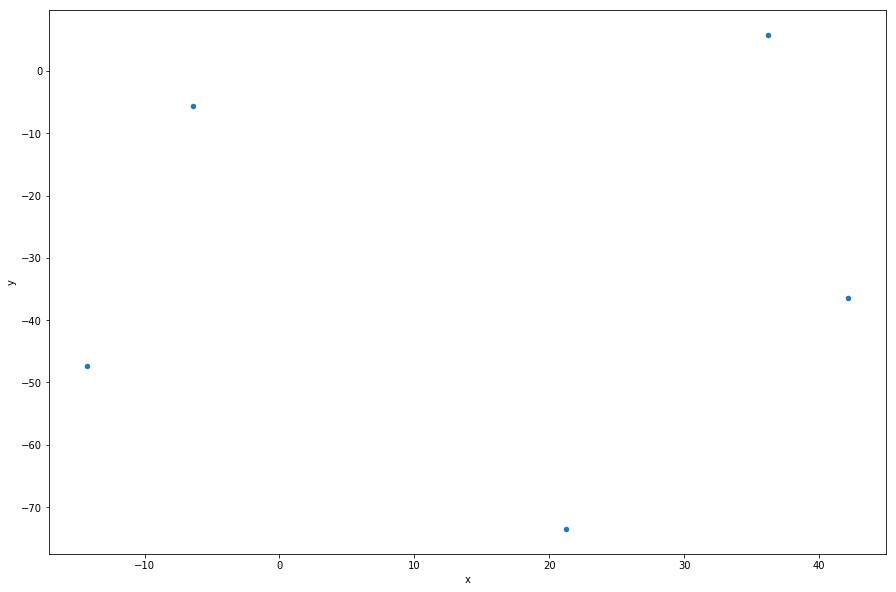

In [38]:
points.plot.scatter("x","y",figsize=(15,10))

In [39]:
def plot_section(x_bound,y_bound):
    section = points[
        (x_bound[0] <= points.x)&
        (points.x <= x_bound[1])&
        (y_bound[0] <= points.y)&
        (points.y <= y_bound[1])
    ]
    
    ax = section.plot.scatter("x","y",figsize=(10,12))
    
    for i, item in section.iterrows():
        ax.text(item.x+.005,item.y+.005,item.word)

In [40]:
plot_section((0,5),(4,5))

ValueError: scatter requires x column to be numeric

In [ ]:
for i, item in points.iterrows():
    if item.word == "Trump":
        print(item.x,item.y)

In [ ]:
model.wv.distance("Obama","Barack")

In [ ]:
model.wv.most_similar("Clin")